<a href="https://colab.research.google.com/github/tyri0n11/distributed-system/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1

Using regular expressions, extract all names from the dataset `yob2012.txt` (including the number of newborns registered in 2012 with their names and sex), which start with letters A to C. How many names did you find?

In [7]:
import re
filtered_people = []
pattern = re.compile(r"^[A-C]*")
with open("yop2012.txt", "r", encoding="utf-8") as f:
    for line in f:
        name, gender, num = line.strip().split(',')
        if pattern.match(name):
            filtered_people.append((name, gender))
print(filtered_people)


[('Sophia', 'F'), ('Emma', 'F'), ('Isabella', 'F'), ('Olivia', 'F'), ('Ava', 'F'), ('Emily', 'F'), ('Abigail', 'F'), ('Mia', 'F'), ('Madison', 'F'), ('Elizabeth', 'F'), ('Chloe', 'F'), ('Ella', 'F'), ('Avery', 'F'), ('Addison', 'F'), ('Aubrey', 'F'), ('Lily', 'F'), ('Natalie', 'F'), ('Sofia', 'F'), ('Charlotte', 'F'), ('Zoey', 'F'), ('Grace', 'F'), ('Hannah', 'F'), ('Amelia', 'F'), ('Harper', 'F'), ('Lillian', 'F'), ('Samantha', 'F'), ('Evelyn', 'F'), ('Victoria', 'F'), ('Brooklyn', 'F'), ('Zoe', 'F'), ('Layla', 'F'), ('Hailey', 'F'), ('Leah', 'F'), ('Kaylee', 'F'), ('Anna', 'F'), ('Aaliyah', 'F'), ('Gabriella', 'F'), ('Allison', 'F'), ('Nevaeh', 'F'), ('Alexis', 'F'), ('Audrey', 'F'), ('Sarah', 'F'), ('Savannah', 'F'), ('Alyssa', 'F'), ('Claire', 'F'), ('Taylor', 'F'), ('Riley', 'F'), ('Camila', 'F'), ('Arianna', 'F'), ('Ashley', 'F'), ('Brianna', 'F'), ('Sophie', 'F'), ('Peyton', 'F'), ('Bella', 'F'), ('Khloe', 'F'), ('Genesis', 'F'), ('Alexa', 'F'), ('Serenity', 'F'), ('Kylie', 'F')

## Exercise 2

1. Write a generator function that generates prime numbers infinitely.
2. Write a generator function that generates a sequence of powers of a given base up to a given exponent. Then pipelining with generator double function which double the sequence from previous generator.

In [8]:
def gen_primes():
    num = 2
    while True:
        for i in range(2, int(num ** 0.5) + 1):
            if num % i == 0:
                break
        else:
            yield num
        num += 1

In [10]:
primes = gen_primes()

for p in primes:
    if p > 100:
        break
    print(p)


2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


## Exercise 3

Given a data `uoe_tweets_07022019`, let do the following tasks:
1. Remove the `screen_name` and `created_at` columns.
2. It would be interesting to see how frequently the university has made posts. Can you group all posts according to their date of publication and then create a plot through time of how many posts have been made each day. </br>
You can use the `DataFrame.groupby()` method to find occurrences. Don't forget to label the axis of your plot. </br>
You can transfrom a `DataFrame.groupby()` object back into a DataFrame by using its `.count()` method
3. We would like to identify the 10 most favourited posts. This can easily be done using the [`nlargest`](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html) method and then simply indexing into the original dataframe. </br>
Find the 10 most popular posts, print them and see what they are about. </br>
You might want to use the `.iloc` method to index into the original data

In [31]:
import pandas as pd

df = pd.read_csv("uoe_tweets_07022019.csv")
print(df.head())

   Unnamed: 0                                               text  \
0           0  RT @EdinUniStaff: Congratulations to the three...   
1           1  The Erasmus+ programme provides tangible benef...   
2           2  .@EdinburghUni values the opportunities Erasmu...   
3           3  A study of the Universe involving Edinburgh’s ...   
4           4  Over 200 genes have been linked to depression,...   

    screen_name           created_at  retweet_count  favorite_count  
0  EdinburghUni  2019-02-07 09:54:30              1               0  
1  EdinburghUni  2019-02-06 16:42:02             18              30  
2  EdinburghUni  2019-02-06 11:57:46             13              38  
3  EdinburghUni  2019-02-05 17:08:06              3               4  
4  EdinburghUni  2019-02-05 16:20:02             10              19  


In [30]:
df = pd.read_csv("uoe_tweets_07022019.csv")
df.drop(columns=["screen_name", "created_at"], inplace=True)

print(df.head())

   Unnamed: 0                                               text  \
0           0  RT @EdinUniStaff: Congratulations to the three...   
1           1  The Erasmus+ programme provides tangible benef...   
2           2  .@EdinburghUni values the opportunities Erasmu...   
3           3  A study of the Universe involving Edinburgh’s ...   
4           4  Over 200 genes have been linked to depression,...   

   retweet_count  favorite_count  
0              1               0  
1             18              30  
2             13              38  
3              3               4  
4             10              19  


            date  post_count
0     2014-08-20           2
1     2014-08-22           1
2     2014-08-23           1
3     2014-08-24           2
4     2014-08-25           2
...          ...         ...
1062  2019-02-02           1
1063  2019-02-04           7
1064  2019-02-05           7
1065  2019-02-06           2
1066  2019-02-07           1

[1067 rows x 2 columns]


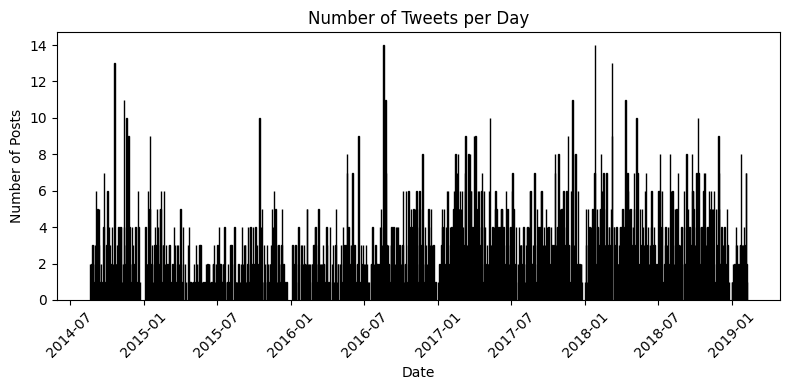

In [36]:
df_full = pd.read_csv("uoe_tweets_07022019.csv")

df_full['created_at'] = pd.to_datetime(df_full['created_at'])

df_full['date'] = df_full['created_at'].dt.date

posts_per_day = df_full.groupby('date').size().reset_index(name='post_count')

print(posts_per_day)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.bar(posts_per_day['date'], posts_per_day['post_count'], color='skyblue', edgecolor='black')

plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of Tweets per Day')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [33]:
top10 = df_full.nlargest(10, 'favorite_count')

print(top10[['text', 'favorite_count']])


                                                   text  favorite_count
2625  Tickets now available for public talk by Bolly...            3725
1434  Congratulations to Canadian PM @JustinTrudeau,...            2553
1320  Scientists have developed a camera that can se...             798
591   We’re ranked in world top 20 in the QS​ World ...             574
1033  We’re number 2 on the @timeshighered list of 1...             522
1688  "Edinburgh is and will remain a proudly #Europ...             492
1594  Celebrate dance today for the #InternationalDa...             478
2606  Congratulations Dr Shah Rukh Khan, honorary gr...             474
1034  Wishing all of our students, staff &amp; frien...             463
965   Bill Gates says some of the world’s best resea...             448


In [34]:
print(df_full.iloc[top10.index[0]])


Unnamed: 0                                                     2625
text              Tickets now available for public talk by Bolly...
screen_name                                            EdinburghUni
created_at                                      2015-10-05 15:36:26
retweet_count                                                  1764
favorite_count                                                 3725
date                                                     2015-10-05
Name: 2625, dtype: object
